# Báo cáo cuối kì Machine Learning

### Các thành viên trong nhóm:
1. Nguyễn Thái Khôi - MSSV: 52100637
2. Lê Khắc Thanh Tùng - MSSV: 52100943
3. Trần Phước Sang - MSSV: 52100303

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("airline_passenger_satisfaction.csv")

In [6]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


# Information about dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [8]:
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [9]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [10]:
df.describe(exclude = np.number)

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


# Visualizing missing data

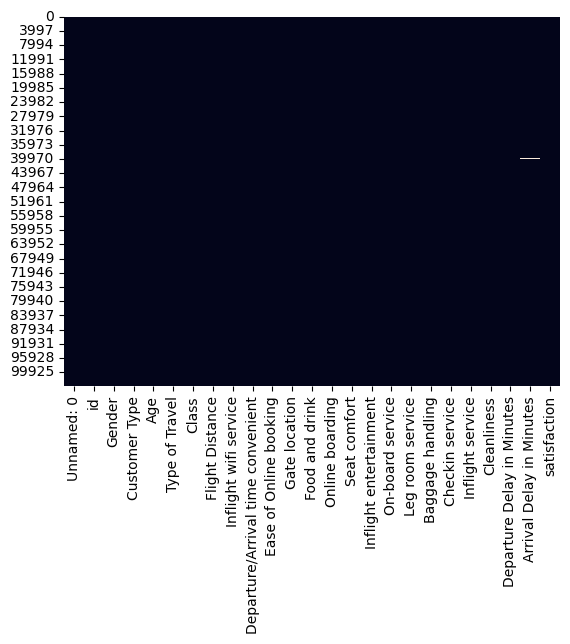

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [12]:
del df["id"]
del df["Unnamed: 0"]

# Visualizing data

In [13]:
arr = [0, 1, 2, 3, 4, 5]

a = df["Gate location"].value_counts()[arr]

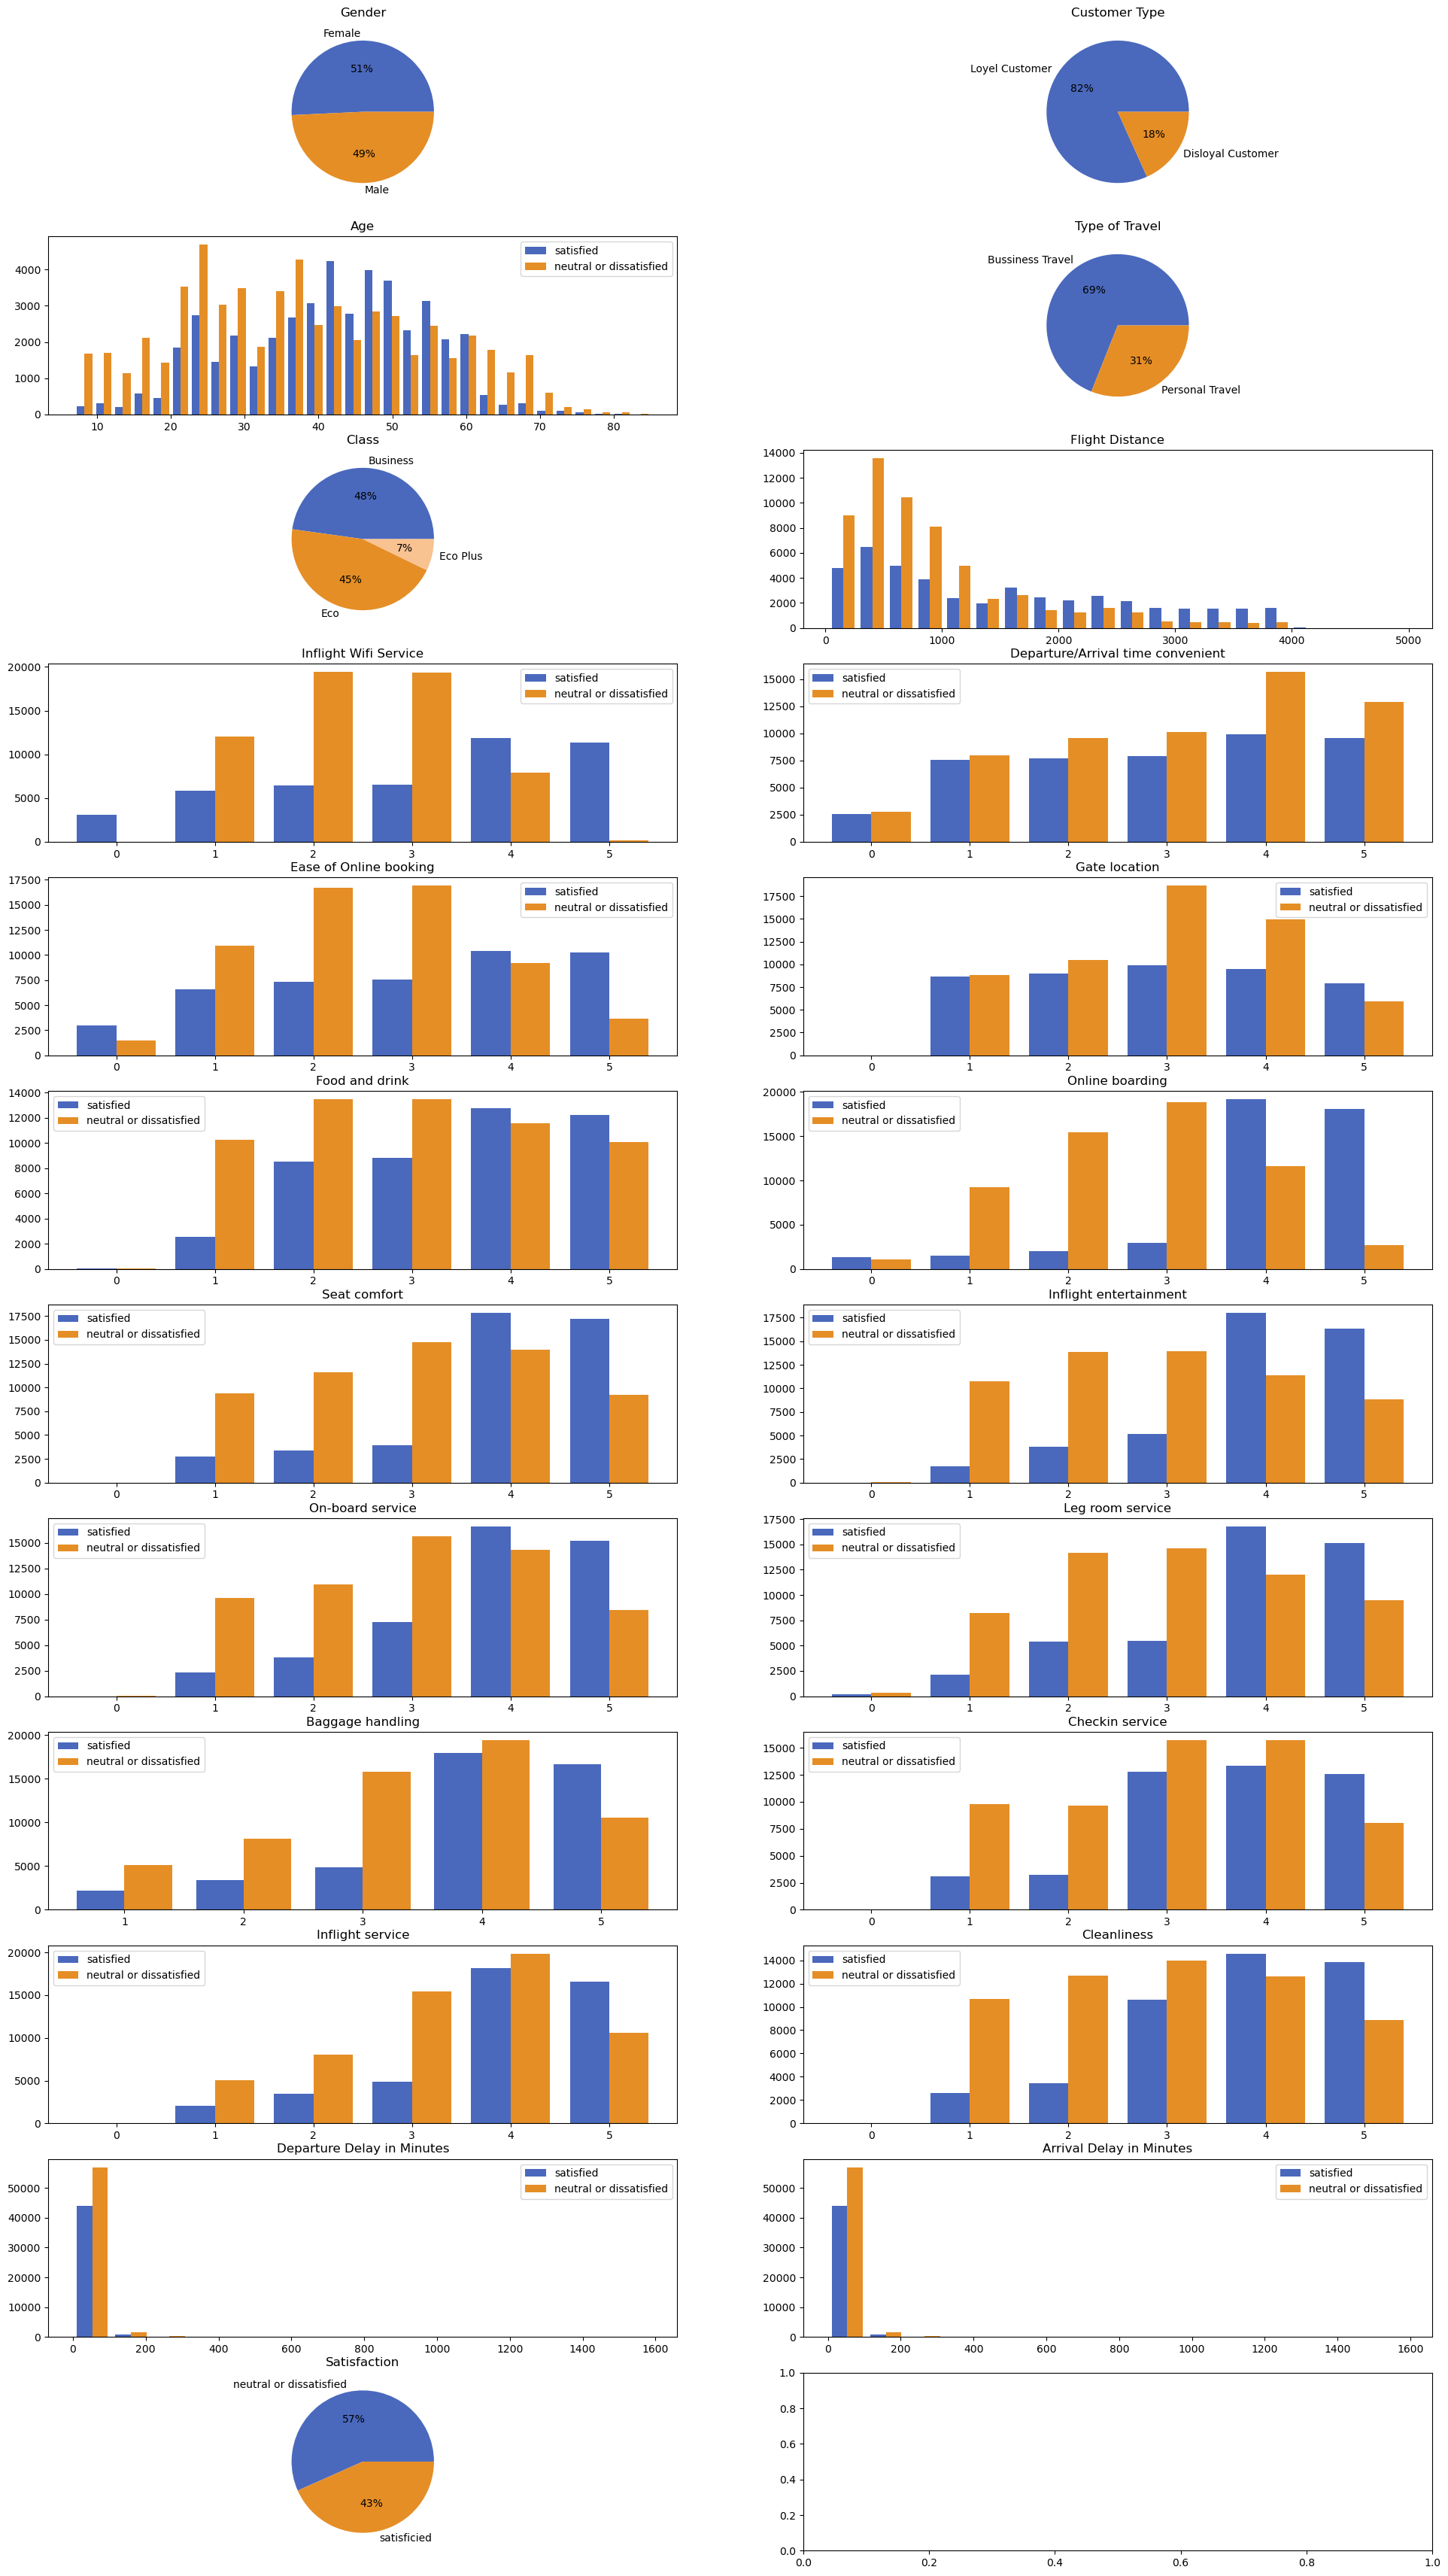

In [14]:
fig, ax = plt.subplots(12, 2)
plt.subplots_adjust(bottom=3, right=3, top=10)

ax[0, 0].pie(df["Gender"].value_counts(), labels=["Female", "Male"], colors=["#4a69bd", "#e58e26"], autopct='%1.0f%%')
ax[0, 0].title.set_text("Gender")

ax[0, 1].pie(df["Customer Type"].value_counts(), labels=["Loyel Customer", "Disloyal Customer"], colors=["#4a69bd", "#e58e26"], autopct='%1.0f%%')
ax[0, 1].title.set_text("Customer Type")

age_satis = df.loc[df["satisfaction"] == "satisfied"]["Age"]
age_dissatis = df.loc[df["satisfaction"] == "neutral or dissatisfied"]["Age"]
ax[1, 0].hist([age_satis, age_dissatis], bins=30, color=["#4a69bd", "#e58e26"], label=["satisfied", "neutral or dissatisfied"])
ax[1, 0].legend(loc='upper right')
ax[1, 0].title.set_text("Age")

ax[1, 1].pie(df["Type of Travel"].value_counts(), labels=["Bussiness Travel", "Personal Travel"], colors=["#4a69bd", "#e58e26"], autopct='%1.0f%%')
ax[1, 1].title.set_text("Type of Travel")

ax[2, 0].pie(df["Class"].value_counts(), labels=["Business", "Eco", "Eco Plus"], colors=["#4a69bd", "#e58e26", "#f8c291"], autopct='%1.0f%%')
ax[2, 0].title.set_text("Class")

flight_dis_satis = df.loc[df["satisfaction"] == "satisfied"]["Flight Distance"]
flight_dis_dissatis = df.loc[df["satisfaction"] == "neutral or dissatisfied"]["Flight Distance"]
ax[2, 1].hist([flight_dis_satis, flight_dis_dissatis], bins=20, color=["#4a69bd", "#e58e26"], label=["satisfied", "neutral or dissatisfied"])
ax[2, 1].title.set_text("Flight Distance")

x_ = np.sort(df["Inflight wifi service"].unique())
y_sa = []
y_dissa = []
for k in x_:
    y_dissa.append(df.loc[(df["Inflight wifi service"] == k) & (df["satisfaction"] == "neutral or dissatisfied")].count()["Inflight wifi service"])
    y_sa.append(df.loc[(df["Inflight wifi service"] == k) & (df["satisfaction"] == "satisfied")].count()["Inflight wifi service"])  
ax[3, 0].bar(x_ - 0.2, y_sa, color="#4a69bd", width=0.4, label="satisfied")
ax[3, 0].bar(x_ + 0.2, y_dissa, color="#e58e26", width=0.4, label="neutral or dissatisfied")
ax[3, 0].legend()
ax[3, 0].title.set_text("Inflight Wifi Service")

x_ = np.sort(df["Departure/Arrival time convenient"].unique())
y_sa = []
y_dissa = []
for k in x_:
    y_dissa.append(df.loc[(df["Departure/Arrival time convenient"] == k) & (df["satisfaction"] == "neutral or dissatisfied")].count()["Departure/Arrival time convenient"])
    y_sa.append(df.loc[(df["Departure/Arrival time convenient"] == k) & (df["satisfaction"] == "satisfied")].count()["Departure/Arrival time convenient"])  
ax[3, 1].bar(x_ - 0.2, y_sa, color="#4a69bd", width=0.4, label="satisfied")
ax[3, 1].bar(x_ + 0.2, y_dissa, color="#e58e26", width=0.4, label="neutral or dissatisfied")
ax[3, 1].legend()
ax[3, 1].title.set_text("Departure/Arrival time convenient")

x_ = np.sort(df["Ease of Online booking"].unique())
y_sa = []
y_dissa = []
for k in x_:
    y_dissa.append(df.loc[(df["Ease of Online booking"] == k) & (df["satisfaction"] == "neutral or dissatisfied")].count()["Ease of Online booking"])
    y_sa.append(df.loc[(df["Ease of Online booking"] == k) & (df["satisfaction"] == "satisfied")].count()["Ease of Online booking"])  
ax[4, 0].bar(x_ - 0.2, y_sa, color="#4a69bd", width=0.4, label="satisfied")
ax[4, 0].bar(x_ + 0.2, y_dissa, color="#e58e26", width=0.4, label="neutral or dissatisfied")
ax[4, 0].legend()
ax[4, 0].title.set_text("Ease of Online booking")
 
x_ = np.sort(df["Gate location"].unique())
y_sa = []
y_dissa = []
for k in x_:
    y_dissa.append(df.loc[(df["Gate location"] == k) & (df["satisfaction"] == "neutral or dissatisfied")].count()["Gate location"])
    y_sa.append(df.loc[(df["Gate location"] == k) & (df["satisfaction"] == "satisfied")].count()["Gate location"])  
ax[4, 1].bar(x_ - 0.2, y_sa, color="#4a69bd", width=0.4, label="satisfied")
ax[4, 1].bar(x_ + 0.2, y_dissa, color="#e58e26", width=0.4, label="neutral or dissatisfied")
ax[4, 1].legend()
ax[4, 1].title.set_text("Gate location")

x_ = np.sort(df["Food and drink"].unique())
y_sa = []
y_dissa = []
for k in x_:
    y_dissa.append(df.loc[(df["Food and drink"] == k) & (df["satisfaction"] == "neutral or dissatisfied")].count()["Food and drink"])
    y_sa.append(df.loc[(df["Food and drink"] == k) & (df["satisfaction"] == "satisfied")].count()["Food and drink"])  
ax[5, 0].bar(x_ - 0.2, y_sa, color="#4a69bd", width=0.4, label="satisfied")
ax[5, 0].bar(x_ + 0.2, y_dissa, color="#e58e26", width=0.4, label="neutral or dissatisfied")
ax[5, 0].legend()
ax[5, 0].title.set_text("Food and drink")

x_ = np.sort(df["Online boarding"].unique())
y_sa = []
y_dissa = []
for k in x_:
    y_dissa.append(df.loc[(df["Online boarding"] == k) & (df["satisfaction"] == "neutral or dissatisfied")].count()["Online boarding"])
    y_sa.append(df.loc[(df["Online boarding"] == k) & (df["satisfaction"] == "satisfied")].count()["Online boarding"])  
ax[5, 1].bar(x_ - 0.2, y_sa, color="#4a69bd", width=0.4, label="satisfied")
ax[5, 1].bar(x_ + 0.2, y_dissa, color="#e58e26", width=0.4, label="neutral or dissatisfied")
ax[5, 1].legend()
ax[5, 1].title.set_text("Online boarding")

x_ = np.sort(df["Seat comfort"].unique())
y_sa = []
y_dissa = []
for k in x_:
    y_dissa.append(df.loc[(df["Seat comfort"] == k) & (df["satisfaction"] == "neutral or dissatisfied")].count()["Seat comfort"])
    y_sa.append(df.loc[(df["Seat comfort"] == k) & (df["satisfaction"] == "satisfied")].count()["Seat comfort"])  
ax[6, 0].bar(x_ - 0.2, y_sa, color="#4a69bd", width=0.4, label="satisfied")
ax[6, 0].bar(x_ + 0.2, y_dissa, color="#e58e26", width=0.4, label="neutral or dissatisfied")
ax[6, 0].legend()
ax[6, 0].title.set_text("Seat comfort")

x_ = np.sort(df["Inflight entertainment"].unique())
y_sa = []
y_dissa = []
for k in x_:
    y_dissa.append(df.loc[(df["Inflight entertainment"] == k) & (df["satisfaction"] == "neutral or dissatisfied")].count()["Inflight entertainment"])
    y_sa.append(df.loc[(df["Inflight entertainment"] == k) & (df["satisfaction"] == "satisfied")].count()["Inflight entertainment"])  
ax[6, 1].bar(x_ - 0.2, y_sa, color="#4a69bd", width=0.4, label="satisfied")
ax[6, 1].bar(x_ + 0.2, y_dissa, color="#e58e26", width=0.4, label="neutral or dissatisfied")
ax[6, 1].legend()
ax[6, 1].title.set_text("Inflight entertainment")

x_ = np.sort(df["On-board service"].unique())
y_sa = []
y_dissa = []
for k in x_:
    y_dissa.append(df.loc[(df["On-board service"] == k) & (df["satisfaction"] == "neutral or dissatisfied")].count()["On-board service"])
    y_sa.append(df.loc[(df["On-board service"] == k) & (df["satisfaction"] == "satisfied")].count()["On-board service"])  
ax[7, 0].bar(x_ - 0.2, y_sa, color="#4a69bd", width=0.4, label="satisfied")
ax[7, 0].bar(x_ + 0.2, y_dissa, color="#e58e26", width=0.4, label="neutral or dissatisfied")
ax[7, 0].legend()
ax[7, 0].title.set_text("On-board service")

x_ = np.sort(df["Leg room service"].unique())
y_sa = []
y_dissa = []
for k in x_:
    y_dissa.append(df.loc[(df["Leg room service"] == k) & (df["satisfaction"] == "neutral or dissatisfied")].count()["Leg room service"])
    y_sa.append(df.loc[(df["Leg room service"] == k) & (df["satisfaction"] == "satisfied")].count()["Leg room service"])  
ax[7, 1].bar(x_ - 0.2, y_sa, color="#4a69bd", width=0.4, label="satisfied")
ax[7, 1].bar(x_ + 0.2, y_dissa, color="#e58e26", width=0.4, label="neutral or dissatisfied")
ax[7, 1].legend()
ax[7, 1].title.set_text("Leg room service")

x_ = np.sort(df["Baggage handling"].unique())
y_sa = []
y_dissa = []
for k in x_:
    y_dissa.append(df.loc[(df["Baggage handling"] == k) & (df["satisfaction"] == "neutral or dissatisfied")].count()["Baggage handling"])
    y_sa.append(df.loc[(df["Baggage handling"] == k) & (df["satisfaction"] == "satisfied")].count()["Baggage handling"])  
ax[8, 0].bar(x_ - 0.2, y_sa, color="#4a69bd", width=0.4, label="satisfied")
ax[8, 0].bar(x_ + 0.2, y_dissa, color="#e58e26", width=0.4, label="neutral or dissatisfied")
ax[8, 0].legend()
ax[8, 0].title.set_text("Baggage handling")

x_ = np.sort(df["Checkin service"].unique())
y_sa = []
y_dissa = []
for k in x_:
    y_dissa.append(df.loc[(df["Checkin service"] == k) & (df["satisfaction"] == "neutral or dissatisfied")].count()["Checkin service"])
    y_sa.append(df.loc[(df["Checkin service"] == k) & (df["satisfaction"] == "satisfied")].count()["Checkin service"])  
ax[8, 1].bar(x_ - 0.2, y_sa, color="#4a69bd", width=0.4, label="satisfied")
ax[8, 1].bar(x_ + 0.2, y_dissa, color="#e58e26", width=0.4, label="neutral or dissatisfied")
ax[8, 1].legend()
ax[8, 1].title.set_text("Checkin service")

x_ = np.sort(df["Inflight service"].unique())
y_sa = []
y_dissa = []
for k in x_:
    y_dissa.append(df.loc[(df["Inflight service"] == k) & (df["satisfaction"] == "neutral or dissatisfied")].count()["Inflight service"])
    y_sa.append(df.loc[(df["Inflight service"] == k) & (df["satisfaction"] == "satisfied")].count()["Inflight service"])  
ax[9, 0].bar(x_ - 0.2, y_sa, color="#4a69bd", width=0.4, label="satisfied")
ax[9, 0].bar(x_ + 0.2, y_dissa, color="#e58e26", width=0.4, label="neutral or dissatisfied")
ax[9, 0].legend()
ax[9, 0].title.set_text("Inflight service")

x_ = np.sort(df["Cleanliness"].unique())
y_sa = []
y_dissa = []
for k in x_:
    y_dissa.append(df.loc[(df["Cleanliness"] == k) & (df["satisfaction"] == "neutral or dissatisfied")].count()["Cleanliness"])
    y_sa.append(df.loc[(df["Cleanliness"] == k) & (df["satisfaction"] == "satisfied")].count()["Cleanliness"])  
ax[9, 1].bar(x_ - 0.2, y_sa, color="#4a69bd", width=0.4, label="satisfied")
ax[9, 1].bar(x_ + 0.2, y_dissa, color="#e58e26", width=0.4, label="neutral or dissatisfied")
ax[9, 1].legend()
ax[9, 1].title.set_text("Cleanliness")

delay_satis = df.loc[df["satisfaction"] == "satisfied"]["Departure Delay in Minutes"]
delay_dissatis = df.loc[df["satisfaction"] == "neutral or dissatisfied"]["Departure Delay in Minutes"]
ax[10, 0].hist([delay_satis, delay_dissatis], bins=15, color=["#4a69bd", "#e58e26"], label=["satisfied", "neutral or dissatisfied"])
ax[10, 0].legend(loc='upper right')
ax[10, 0].title.set_text("Departure Delay in Minutes")

arrival_satis = df.loc[df["satisfaction"] == "satisfied"]["Arrival Delay in Minutes"]
arrival_dissatis = df.loc[df["satisfaction"] == "neutral or dissatisfied"]["Arrival Delay in Minutes"]
ax[10, 1].hist([delay_satis, delay_dissatis], bins=15, color=["#4a69bd", "#e58e26"], label=["satisfied", "neutral or dissatisfied"])
ax[10, 1].legend(loc='upper right')
ax[10, 1].title.set_text("Arrival Delay in Minutes")

ax[11, 0].pie(df["satisfaction"].value_counts(), labels=["neutral or dissatisfied", "satisficied"], colors=["#4a69bd", "#e58e26"], autopct='%1.0f%%')
ax[11, 0].title.set_text("Satisfaction")

# Preprocessing data

## Handle missing data

In [15]:
for col in df.columns:
    if df[col].dtypes != 'object':
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [16]:
df.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

## Transformation data

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

## Normalization data

In [18]:
from sklearn.preprocessing import MinMaxScaler

X = np.array(df.iloc[:, 1:-1])
y = np.array(df.iloc[:, -1])

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

## Split data into training/ testing set

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)

(77928, 21)
(77928,)


# Basic Machine Learning models

## K-Nearest Neighbors Classifier

In [20]:
knn_train_score = []
knn_test_score = []
knn_setup = ["k=1", "k=3", "k=5"]
x_axis = np.arange(len(knn_setup))

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

clf = KNeighborsClassifier(n_neighbors=1)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

knn_train_score.append(clf.score(X_train, y_train))
knn_test_score.append(clf.score(X_test, y_test))

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93     14677
           1       0.93      0.89      0.91     11299

    accuracy                           0.92     25976
   macro avg       0.92      0.92      0.92     25976
weighted avg       0.92      0.92      0.92     25976



In [22]:
clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

knn_train_score.append(clf.score(X_train, y_train))
knn_test_score.append(clf.score(X_test, y_test))

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     14677
           1       0.95      0.89      0.92     11299

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



In [23]:
clf = KNeighborsClassifier(n_neighbors=5)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

knn_train_score.append(clf.score(X_train, y_train))
knn_test_score.append(clf.score(X_test, y_test))

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     14677
           1       0.95      0.89      0.92     11299

    accuracy                           0.93     25976
   macro avg       0.94      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



### Bảng so sánh training score và testing score của KNN với các giá trị k khác nhau

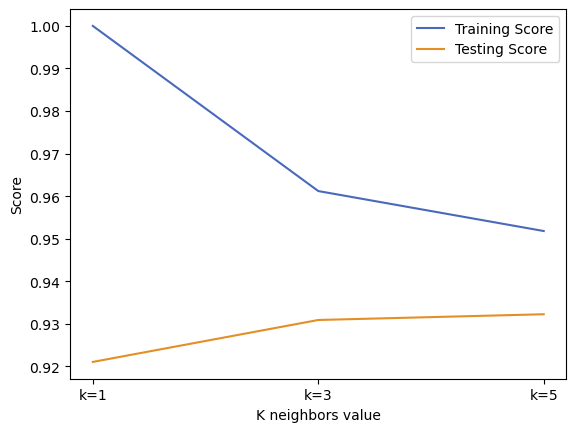

In [24]:
plt.plot(x_axis, knn_train_score, color="#4a69bd", label="Training Score")
plt.plot(x_axis, knn_test_score, color="#e58e26", label="Testing Score")
plt.xticks(x_axis, knn_setup)
plt.xlabel("K neighbors value")
plt.ylabel("Score")
plt.legend()
plt.show()

## Decision Tree Classifier

### Decision Tree with different criterion

In [25]:
criterion = ["gini", "entropy", "log_loss"]
training_score = []
testing_score = []

In [26]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion="gini")
clf.fit(X_train, y_train)

training_score.append(clf.score(X_train, y_train))
testing_score.append(clf.score(X_test, y_test))

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     14677
           1       0.94      0.94      0.94     11299

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



In [27]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train, y_train)

training_score.append(clf.score(X_train, y_train))
testing_score.append(clf.score(X_test, y_test))

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     14677
           1       0.94      0.94      0.94     11299

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



In [28]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion="log_loss")
clf.fit(X_train, y_train)

training_score.append(clf.score(X_train, y_train))
testing_score.append(clf.score(X_test, y_test))

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     14677
           1       0.94      0.94      0.94     11299

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



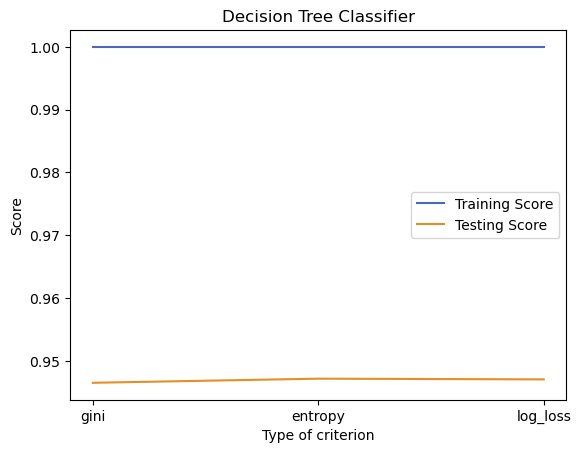

In [29]:
plt.plot(criterion, training_score, color="#4a69bd", label="Training Score")
plt.plot(criterion, testing_score, color="#e58e26", label="Testing Score")
plt.xlabel("Type of criterion")
plt.ylabel("Score")
plt.title("Decision Tree Classifier")
plt.legend()
plt.show()

### Decision Tree Classifier with different max_depth value and criterion='entropy'

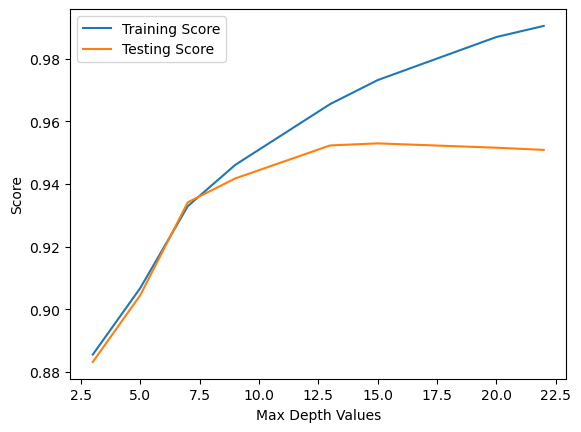

In [30]:
max_depth = [3, 5, 7, 9, 13, 15, 20, 22]
training_score = []
testing_score = []

for k in max_depth:
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=k)
    clf.fit(X_train, y_train)
    training_score.append(clf.score(X_train, y_train))
    testing_score.append(clf.score(X_test, y_test))

plt.plot(max_depth, training_score, label="Training Score")
plt.plot(max_depth, testing_score, label="Testing Score")
plt.xlabel("Max Depth Values")
plt.ylabel("Score")
plt.legend()
plt.show()

## Logistic Regression 

In [31]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=100, solver='liblinear', penalty='l2', C=0.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     14677
           1       0.87      0.84      0.85     11299

    accuracy                           0.88     25976
   macro avg       0.88      0.87      0.87     25976
weighted avg       0.88      0.88      0.88     25976



## Naive Bayes

In [32]:
type_NB = ["Gassian", "Bernoulli", "Multinomial", "Complement", "Categorical"]
test_score = []

### Gaussian Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

test_score.append(model.score(X_test, y_test))

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88     14677
           1       0.86      0.82      0.84     11299

    accuracy                           0.86     25976
   macro avg       0.86      0.86      0.86     25976
weighted avg       0.86      0.86      0.86     25976



### Bernoulli Naive Bayes

In [34]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

test_score.append(model.score(X_test, y_test))

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.77      0.80     14677
           1       0.73      0.78      0.75     11299

    accuracy                           0.78     25976
   macro avg       0.77      0.78      0.77     25976
weighted avg       0.78      0.78      0.78     25976



### Multinomial Naive Bayes

In [35]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

test_score.append(model.score(X_test, y_test))

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83     14677
           1       0.78      0.78      0.78     11299

    accuracy                           0.81     25976
   macro avg       0.81      0.81      0.81     25976
weighted avg       0.81      0.81      0.81     25976



### Complement Naive Bayes

In [36]:
from sklearn.naive_bayes import ComplementNB

model = ComplementNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

test_score.append(model.score(X_test, y_test))

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.78      0.82     14677
           1       0.74      0.83      0.78     11299

    accuracy                           0.80     25976
   macro avg       0.80      0.80      0.80     25976
weighted avg       0.81      0.80      0.80     25976



### Categorical Naive Bayes

In [37]:
from sklearn.naive_bayes import ComplementNB

model = ComplementNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

test_score.append(model.score(X_test, y_test))

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.78      0.82     14677
           1       0.74      0.83      0.78     11299

    accuracy                           0.80     25976
   macro avg       0.80      0.80      0.80     25976
weighted avg       0.81      0.80      0.80     25976



## Compare testing score of different Naive Bayes models

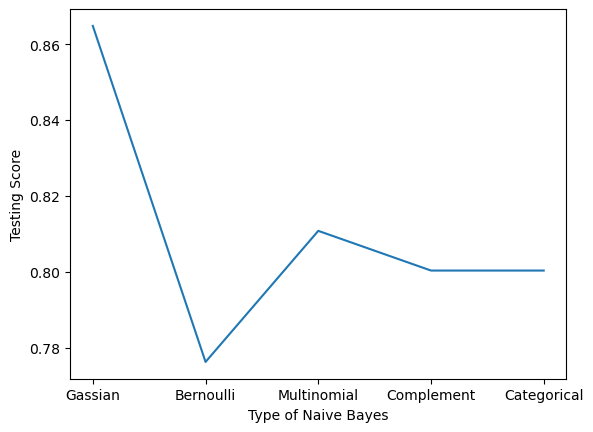

In [38]:
plt.plot(type_NB, test_score)
plt.xlabel("Type of Naive Bayes")
plt.ylabel("Testing Score")
plt.show()

## Support Vector Machine

### With kernel is "linear"

In [39]:
from sklearn.svm import SVC

svc = SVC(kernel="linear", C=1.)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90     14677
           1       0.88      0.83      0.86     11299

    accuracy                           0.88     25976
   macro avg       0.88      0.87      0.88     25976
weighted avg       0.88      0.88      0.88     25976



### With kernel is "poly"

In [40]:
from sklearn.svm import SVC

svc = SVC(kernel="poly", C=1.)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96     14677
           1       0.96      0.92      0.94     11299

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



### With kernel is "rbf"

In [41]:
from sklearn.svm import SVC

svc = SVC(kernel="rbf", C=1.)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14677
           1       0.96      0.93      0.94     11299

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



# Ensemble Learning

## Random Forest 

In [42]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=16)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     14677
           1       0.97      0.94      0.95     11299

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



## Adaboost Classifier

In [43]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     14677
           1       0.92      0.91      0.92     11299

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



## Bagging Classifier

In [44]:
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     14677
           1       0.97      0.93      0.95     11299

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



## Gradient Boosting Classifier

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     14677
           1       0.95      0.92      0.93     11299

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



# Prevent Overfitting with Basic ML Models

## K-Nearest Neighbors Classifier

Để tránh overfitting đối với mô hình KNN, chúng ta sẽ chọn 1 giá trị k phù hợp (thay vì mặc định k=1). Framework GridSearchCV trong thư viện sklearn sẽ hỗ trợ chúng ta chọn ra giá trị k thích hợp cho mô hình.

In [46]:
from sklearn.model_selection import GridSearchCV

clf_knn = KNeighborsClassifier(weights="distance")

param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = GridSearchCV(clf_knn, param_grid, cv=9)

knn_gscv.fit(X_train, y_train)

knn_gscv.best_params_


{'n_neighbors': 12}

In [47]:
clf = KNeighborsClassifier(n_neighbors=12, weights="distance")
clf.fit(X_train, y_train)
clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     14677
           1       0.95      0.92      0.93     11299

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



## Decision Tree Classifier

Để tránh overfitting với Decision Tree, chúng ta sẽ giới hạn độ sâu của các nhánh, hay nói cách khác là giới hạn số lượng feature được sử dụng để split. 

Maximum Testing Score with max_depth = 17


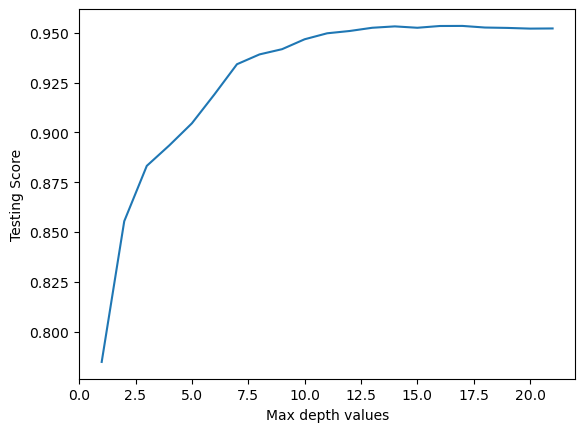

In [48]:
max_depth_values = np.arange(1, len(df.columns)-1)
testing_score = []

for max_depth in max_depth_values:
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    clf.fit(X_train, y_train)
    testing_score.append(clf.score(X_test, y_test))

print("Maximum Testing Score with max_depth =", max_depth_values[testing_score.index(max(testing_score))])

plt.plot(max_depth_values, testing_score)
plt.xlabel("Max depth values")
plt.ylabel("Testing Score")
plt.show()

## Logistic Regression

Đối với Logistic Regression, ta sử dụng LogisticRegressionCV, để áp dụng Cross-validation vào mô hình nhầm tránh overfiting

In [49]:
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV(cv=9, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     14677
           1       0.87      0.84      0.86     11299

    accuracy                           0.88     25976
   macro avg       0.88      0.87      0.87     25976
weighted avg       0.88      0.88      0.88     25976



## Support Vector Machine

Để tránh overfiting đối với SVM, ta set giá trị C để điều chỉnh margin giữa các class nhầm maximum-margin.

In [50]:
from sklearn.svm import SVC

svc = SVC(kernel="rbf", C=5.)
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14677
           1       0.96      0.93      0.95     11299

    accuracy                           0.96     25976
   macro avg       0.96      0.95      0.96     25976
weighted avg       0.96      0.96      0.96     25976



# Neural Network

In [51]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)

## Feed Forward Neural Network

In [52]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [53]:
hist = model.fit(X_train, y_train_cat, epochs=100, batch_size=1028, verbose=2, validation_split=0.1)

Epoch 1/100
69/69 - 1s - loss: 0.4462 - accuracy: 0.8167 - val_loss: 0.3034 - val_accuracy: 0.8826 - 1s/epoch - 16ms/step
Epoch 2/100
69/69 - 0s - loss: 0.2798 - accuracy: 0.8909 - val_loss: 0.2343 - val_accuracy: 0.9133 - 186ms/epoch - 3ms/step
Epoch 3/100
69/69 - 0s - loss: 0.2138 - accuracy: 0.9156 - val_loss: 0.1841 - val_accuracy: 0.9278 - 182ms/epoch - 3ms/step
Epoch 4/100
69/69 - 0s - loss: 0.1719 - accuracy: 0.9313 - val_loss: 0.1514 - val_accuracy: 0.9424 - 179ms/epoch - 3ms/step
Epoch 5/100
69/69 - 0s - loss: 0.1513 - accuracy: 0.9398 - val_loss: 0.1400 - val_accuracy: 0.9484 - 185ms/epoch - 3ms/step
Epoch 6/100
69/69 - 0s - loss: 0.1402 - accuracy: 0.9440 - val_loss: 0.1321 - val_accuracy: 0.9466 - 183ms/epoch - 3ms/step
Epoch 7/100
69/69 - 0s - loss: 0.1316 - accuracy: 0.9475 - val_loss: 0.1247 - val_accuracy: 0.9521 - 189ms/epoch - 3ms/step
Epoch 8/100
69/69 - 0s - loss: 0.1305 - accuracy: 0.9468 - val_loss: 0.1220 - val_accuracy: 0.9526 - 189ms/epoch - 3ms/step
Epoch 9/10

Epoch 67/100
69/69 - 0s - loss: 0.0821 - accuracy: 0.9644 - val_loss: 0.0940 - val_accuracy: 0.9602 - 181ms/epoch - 3ms/step
Epoch 68/100
69/69 - 0s - loss: 0.0819 - accuracy: 0.9640 - val_loss: 0.0941 - val_accuracy: 0.9605 - 178ms/epoch - 3ms/step
Epoch 69/100
69/69 - 0s - loss: 0.0810 - accuracy: 0.9646 - val_loss: 0.0908 - val_accuracy: 0.9659 - 173ms/epoch - 3ms/step
Epoch 70/100
69/69 - 0s - loss: 0.0815 - accuracy: 0.9645 - val_loss: 0.0932 - val_accuracy: 0.9621 - 177ms/epoch - 3ms/step
Epoch 71/100
69/69 - 0s - loss: 0.0809 - accuracy: 0.9644 - val_loss: 0.0946 - val_accuracy: 0.9630 - 179ms/epoch - 3ms/step
Epoch 72/100
69/69 - 0s - loss: 0.0822 - accuracy: 0.9644 - val_loss: 0.0935 - val_accuracy: 0.9624 - 183ms/epoch - 3ms/step
Epoch 73/100
69/69 - 0s - loss: 0.0814 - accuracy: 0.9649 - val_loss: 0.0930 - val_accuracy: 0.9623 - 211ms/epoch - 3ms/step
Epoch 74/100
69/69 - 0s - loss: 0.0805 - accuracy: 0.9652 - val_loss: 0.0947 - val_accuracy: 0.9600 - 216ms/epoch - 3ms/step


In [54]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)

812/812 [==============================] - 1s 881us/step


In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     14677
           1       0.97      0.93      0.95     11299

    accuracy                           0.96     25976
   macro avg       0.96      0.95      0.96     25976
weighted avg       0.96      0.96      0.96     25976



## Wide and Deep Neural Network 

In [61]:
import tensorflow as tf

normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(64, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(32, activation="relu")
hidden_layer3 = tf.keras.layers.Dense(16, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(2, activation="softmax")

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
hidden3 = hidden_layer3(hidden2)
concat = concat_layer([normalized, hidden3])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

In [62]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
normalization_layer.adapt(X_train)

In [63]:
history = model.fit(X_train, y_train_cat, epochs=100, batch_size=2056, validation_split=0.1)

Epoch 1/100
35/35 [==============================] - 1s 6ms/step - loss: 0.6102 - accuracy: 0.7026 - val_loss: 0.4015 - val_accuracy: 0.8458
Epoch 2/100
35/35 [==============================] - 0s 3ms/step - loss: 0.3408 - accuracy: 0.8712 - val_loss: 0.2854 - val_accuracy: 0.8982
Epoch 3/100
35/35 [==============================] - 0s 3ms/step - loss: 0.2646 - accuracy: 0.9008 - val_loss: 0.2286 - val_accuracy: 0.9124
Epoch 4/100
35/35 [==============================] - 0s 3ms/step - loss: 0.2188 - accuracy: 0.9142 - val_loss: 0.1941 - val_accuracy: 0.9204
Epoch 5/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1917 - accuracy: 0.9243 - val_loss: 0.1752 - val_accuracy: 0.9283
Epoch 6/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1752 - accuracy: 0.9299 - val_loss: 0.1631 - val_accuracy: 0.9329
Epoch 7/100
35/35 [==============================] - 0s 3ms/step - loss: 0.1639 - accuracy: 0.9347 - val_loss: 0.1549 - val_accuracy: 0.9378
Epoch 8/100
3

Epoch 59/100
35/35 [==============================] - 0s 3ms/step - loss: 0.0827 - accuracy: 0.9642 - val_loss: 0.1002 - val_accuracy: 0.9565
Epoch 60/100
35/35 [==============================] - 0s 3ms/step - loss: 0.0825 - accuracy: 0.9643 - val_loss: 0.0978 - val_accuracy: 0.9583
Epoch 61/100
35/35 [==============================] - 0s 3ms/step - loss: 0.0819 - accuracy: 0.9646 - val_loss: 0.0976 - val_accuracy: 0.9605
Epoch 62/100
35/35 [==============================] - 0s 3ms/step - loss: 0.0814 - accuracy: 0.9649 - val_loss: 0.1026 - val_accuracy: 0.9573
Epoch 63/100
35/35 [==============================] - 0s 4ms/step - loss: 0.0813 - accuracy: 0.9649 - val_loss: 0.1002 - val_accuracy: 0.9573
Epoch 64/100
35/35 [==============================] - 0s 3ms/step - loss: 0.0809 - accuracy: 0.9648 - val_loss: 0.0978 - val_accuracy: 0.9601
Epoch 65/100
35/35 [==============================] - 0s 4ms/step - loss: 0.0807 - accuracy: 0.9651 - val_loss: 0.0982 - val_accuracy: 0.9593
Epoch 

In [64]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)

812/812 [==============================] - 1s 872us/step


In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14677
           1       0.97      0.93      0.95     11299

    accuracy                           0.96     25976
   macro avg       0.96      0.95      0.96     25976
weighted avg       0.96      0.96      0.96     25976



# Prevent Overfiting with Neural Network

Trong Neural Network để tránh overfiting, chúng ta sẽ thêm 1 lớp Dropout 

In [74]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [75]:
hist = model.fit(X_train, y_train_cat, epochs=100, batch_size=1028, verbose=2, validation_split=0.1)

Epoch 1/100
69/69 - 1s - loss: 0.5931 - accuracy: 0.6807 - val_loss: 0.3638 - val_accuracy: 0.8523 - 1s/epoch - 16ms/step
Epoch 2/100
69/69 - 0s - loss: 0.3667 - accuracy: 0.8534 - val_loss: 0.2934 - val_accuracy: 0.8863 - 257ms/epoch - 4ms/step
Epoch 3/100
69/69 - 0s - loss: 0.2985 - accuracy: 0.8813 - val_loss: 0.2217 - val_accuracy: 0.9153 - 277ms/epoch - 4ms/step
Epoch 4/100
69/69 - 0s - loss: 0.2522 - accuracy: 0.8996 - val_loss: 0.1932 - val_accuracy: 0.9258 - 286ms/epoch - 4ms/step
Epoch 5/100
69/69 - 0s - loss: 0.2226 - accuracy: 0.9112 - val_loss: 0.1673 - val_accuracy: 0.9364 - 290ms/epoch - 4ms/step
Epoch 6/100
69/69 - 0s - loss: 0.2043 - accuracy: 0.9181 - val_loss: 0.1520 - val_accuracy: 0.9424 - 341ms/epoch - 5ms/step
Epoch 7/100
69/69 - 0s - loss: 0.1898 - accuracy: 0.9233 - val_loss: 0.1434 - val_accuracy: 0.9450 - 294ms/epoch - 4ms/step
Epoch 8/100
69/69 - 0s - loss: 0.1771 - accuracy: 0.9271 - val_loss: 0.1358 - val_accuracy: 0.9476 - 290ms/epoch - 4ms/step
Epoch 9/10

Epoch 67/100
69/69 - 0s - loss: 0.1016 - accuracy: 0.9570 - val_loss: 0.0887 - val_accuracy: 0.9645 - 286ms/epoch - 4ms/step
Epoch 68/100
69/69 - 0s - loss: 0.1017 - accuracy: 0.9570 - val_loss: 0.0884 - val_accuracy: 0.9647 - 284ms/epoch - 4ms/step
Epoch 69/100
69/69 - 0s - loss: 0.0995 - accuracy: 0.9574 - val_loss: 0.0869 - val_accuracy: 0.9650 - 282ms/epoch - 4ms/step
Epoch 70/100
69/69 - 0s - loss: 0.1000 - accuracy: 0.9572 - val_loss: 0.0890 - val_accuracy: 0.9654 - 285ms/epoch - 4ms/step
Epoch 71/100
69/69 - 0s - loss: 0.0992 - accuracy: 0.9577 - val_loss: 0.0882 - val_accuracy: 0.9663 - 285ms/epoch - 4ms/step
Epoch 72/100
69/69 - 0s - loss: 0.0986 - accuracy: 0.9579 - val_loss: 0.0885 - val_accuracy: 0.9647 - 285ms/epoch - 4ms/step
Epoch 73/100
69/69 - 0s - loss: 0.0995 - accuracy: 0.9577 - val_loss: 0.0873 - val_accuracy: 0.9647 - 282ms/epoch - 4ms/step
Epoch 74/100
69/69 - 0s - loss: 0.1004 - accuracy: 0.9577 - val_loss: 0.0865 - val_accuracy: 0.9656 - 311ms/epoch - 5ms/step


In [76]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)

812/812 [==============================] - 1s 869us/step


In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     14677
           1       0.98      0.93      0.95     11299

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



# Để cải thiện độ chính xác của mô hình sau khi huấn luyện, ta có thể thực hiện các bước sau:

## Phân tích các trường hợp sai
Bước đầu tiên là phân tích các trường hợp sai của mô hình. Điều này có thể được thực hiện bằng cách xem xét các mẫu dữ liệu mà mô hình đã dự đoán sai. Các trường hợp sai có thể được phân loại thành hai loại:

- **Lỗi do bias:** Lỗi này xảy ra khi mô hình không thể nắm bắt được các mối quan hệ quan trọng trong dữ liệu. Lỗi bias thường dẫn đến việc mô hình dự đoán sai các mẫu dữ liệu mới.
- **Lỗi do variance:** Lỗi này xảy ra khi mô hình quá khớp với tập dữ liệu huấn luyện. Lỗi variance thường dẫn đến việc mô hình dự đoán sai các mẫu dữ liệu mới.

**Đề ra giải pháp**

Sau khi phân tích các trường hợp sai, ta có thể đề ra các giải pháp để cải thiện độ chính xác của mô hình. Các giải pháp này có thể bao gồm:

- **Thay đổi kiến trúc mô hình:** Nếu lỗi do bias, ta có thể thay đổi kiến trúc mô hình để mô hình có thể nắm bắt được các mối quan hệ quan trọng trong dữ liệu tốt hơn.
- **Tăng cường dữ liệu:** Nếu lỗi do variance, ta có thể tăng cường dữ liệu để mô hình có thể học được các mối quan hệ tổng quát hơn.
- **Áp dụng kỹ thuật regularize:** Kỹ thuật regularize giúp giảm thiểu sự khớp của mô hình với tập dữ liệu huấn luyện, từ đó cải thiện độ chính xác của mô hình trên tập dữ liệu mới.

**Thực hiện giải pháp**

Sau khi đề ra các giải pháp, ta cần thực hiện các giải pháp đó. Việc thực hiện các giải pháp có thể bao gồm:

- **Tái huấn luyện mô hình với kiến trúc mới:** Nếu thay đổi kiến trúc mô hình, ta cần huấn luyện lại mô hình với tập dữ liệu huấn luyện mới.
- **Thêm dữ liệu mới vào tập dữ liệu huấn luyện:** Nếu tăng cường dữ liệu, ta cần thêm dữ liệu mới vào tập dữ liệu huấn luyện.
- **Áp dụng kỹ thuật regularize:** Nếu áp dụng kỹ thuật regularize, ta cần điều chỉnh các siêu tham số của kỹ thuật regularize.

**Đánh giá hiệu quả**

Sau khi thực hiện các giải pháp, ta cần đánh giá hiệu quả của các giải pháp đó. Việc đánh giá hiệu quả có thể được thực hiện bằng cách xem xét độ chính xác của mô hình trên tập dữ liệu kiểm tra.

Nếu độ chính xác của mô hình trên tập dữ liệu kiểm tra cải thiện so với trước, thì các giải pháp đã được đề ra là hiệu quả. Nếu độ chính xác của mô hình không cải thiện, thì ta cần tiếp tục phân tích và đề ra các giải pháp khác.

Dưới đây là một số ví dụ cụ thể về cách cải thiện độ chính xác của mô hình sau khi huấn luyện:

- Trong trường hợp lỗi do bias, ta có thể thay đổi kiến trúc mô hình bằng cách thêm các lớp ẩn, tăng số lượng tham số của mô hình, hoặc sử dụng các kỹ thuật như dropout hoặc batch normalization.
- Trong trường hợp lỗi do variance, ta có thể tăng cường dữ liệu bằng cách tạo các mẫu dữ liệu mới từ các mẫu dữ liệu hiện có.
- Ta cũng có thể áp dụng kỹ thuật regularize như L1 regularization hoặc L2 regularization để giảm thiểu sự khớp của mô hình với tập dữ liệu huấn luyện.
Việc lựa chọn giải pháp nào để cải thiện độ chính xác của mô hình phụ thuộc vào nguyên nhân gây ra lỗi của mô hình.